In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import scipy.special
import math
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data##
from ReadAndCleanData import train_csv, test_csv, submission_csv, structures_csv



In [3]:
#Let's see what kind of data we are dealing with
print("train file has shape:", train_csv.shape)
print("test file has shape:", test_csv.shape)
print("structures file has shape:", structures_csv.shape)

#print(train_csv.head(20))
#print(structures_csv.head(20))

train file has shape: (4658147, 6)
test file has shape: (2505542, 5)
structures file has shape: (2358657, 6)


count    4.658147e+06
mean     1.592164e+01
std      3.494198e+01
min     -3.621860e+01
25%     -2.549780e-01
50%      2.281130e+00
75%      7.390655e+00
max      2.048800e+02
Name: scalar_coupling_constant, dtype: float64


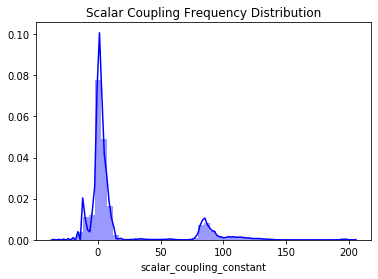

In [4]:
# We aim to analyze and predict the scalar_coupling_constant for arbitrary atoms
# Let's investigate this quantity in the training data

print(train_csv['scalar_coupling_constant'].describe())
sns.distplot(train_csv['scalar_coupling_constant'], color = 'blue')
plt.title("Scalar Coupling Frequency Distribution")
plt.show()

[1JHC, 2JHH, 1JHN, 2JHN, 2JHC, 3JHH, 3JHC, 3JHN]
Categories (8, object): [1JHC, 2JHH, 1JHN, 2JHN, 2JHC, 3JHH, 3JHC, 3JHN]
The scalar coupling constant for bond type 1JHC can be described by
count    709416.000000
mean         94.976151
std          18.277237
min          66.600800
25%          84.023003
50%          88.223652
75%         100.735001
max         204.880005
Name: scalar_coupling_constant, dtype: float64
The scalar coupling constant for bond type 2JHH can be described by
count    378036.000000
mean        -10.286606
std           3.979607
min         -35.176102
25%         -12.026800
50%         -11.328700
75%          -9.643585
max          11.854200
Name: scalar_coupling_constant, dtype: float64
The scalar coupling constant for bond type 1JHN can be described by
count    43363.000000
mean        47.479885
std         10.922172
min         24.322201
25%         36.496799
50%         47.789398
75%         57.053101
max         80.418701
Name: scalar_coupling_constant, dtyp

<Figure size 1872x1728 with 0 Axes>

<Figure size 1872x1728 with 0 Axes>

<Figure size 1872x1728 with 0 Axes>

<Figure size 1872x1728 with 0 Axes>

<Figure size 1872x1728 with 0 Axes>

<Figure size 1872x1728 with 0 Axes>

<Figure size 1872x1728 with 0 Axes>

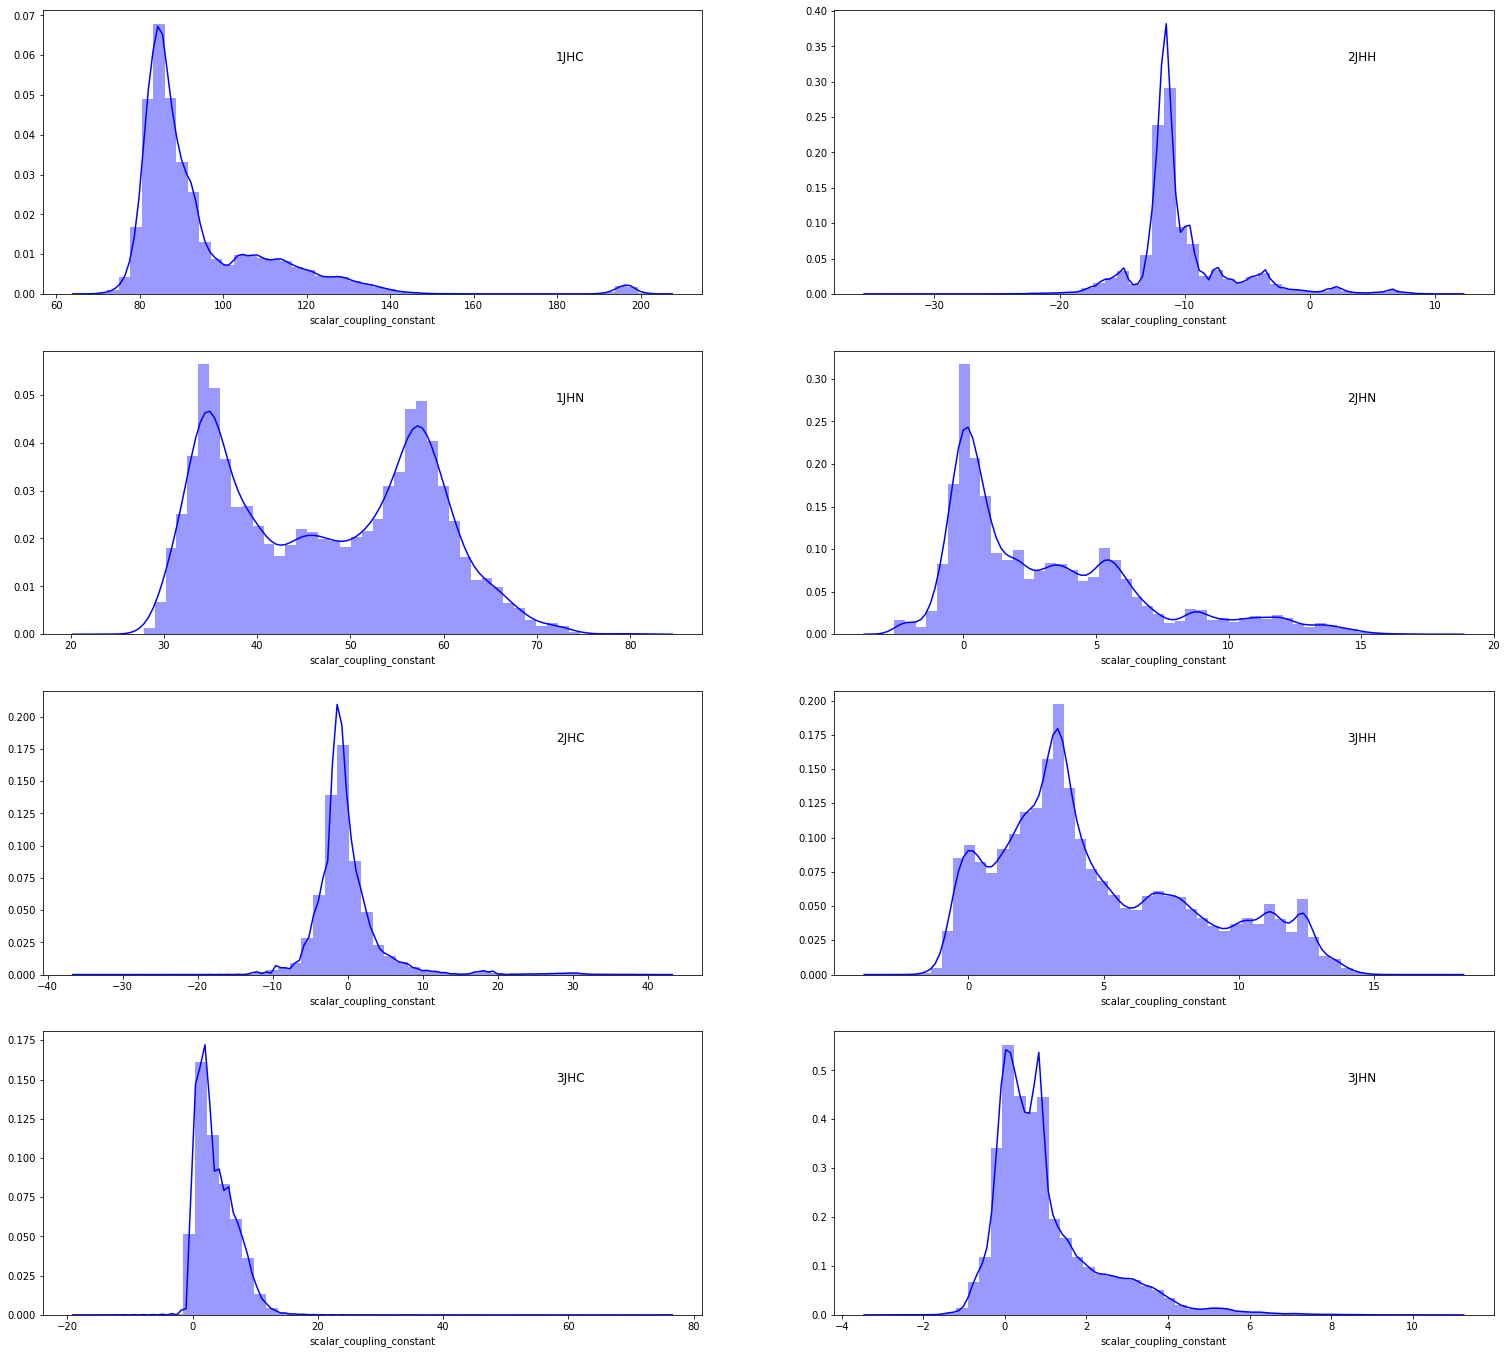

In [5]:
#There are 8 types of bonds occurring in the data
bond_types = train_csv["type"].unique()
print(bond_types)

for bond_type in bond_types:
    print(f"The scalar coupling constant for bond type {bond_type} can be described by")
    print(train_csv[train_csv['type']==bond_type]['scalar_coupling_constant'].describe())
    plt.figure(figsize=(26, 24))
for i, bond_type in enumerate(bond_types):
    plt.subplot(4, 2, i + 1)
    sns.distplot(train_csv[train_csv['type'] == bond_type]['scalar_coupling_constant'], color='blue')
    plt.title(bond_type, x=.8, y=.8)
plt.show()